In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

# 1. Load the dataset into python environment

In [4]:
data=pd.read_csv('/Users/geena.tharian/Downloads/titanic_dataset.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [47]:
df=pd.read_csv('/Users/geena.tharian/Downloads/titanic_dataset.csv',index_col='PassengerId')


In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [12]:
df.shape

(891, 11)

In [13]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 4. Fill in all the missing values present in all the columns in the dataset

In [48]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#fill in mising value column=Age(float64)

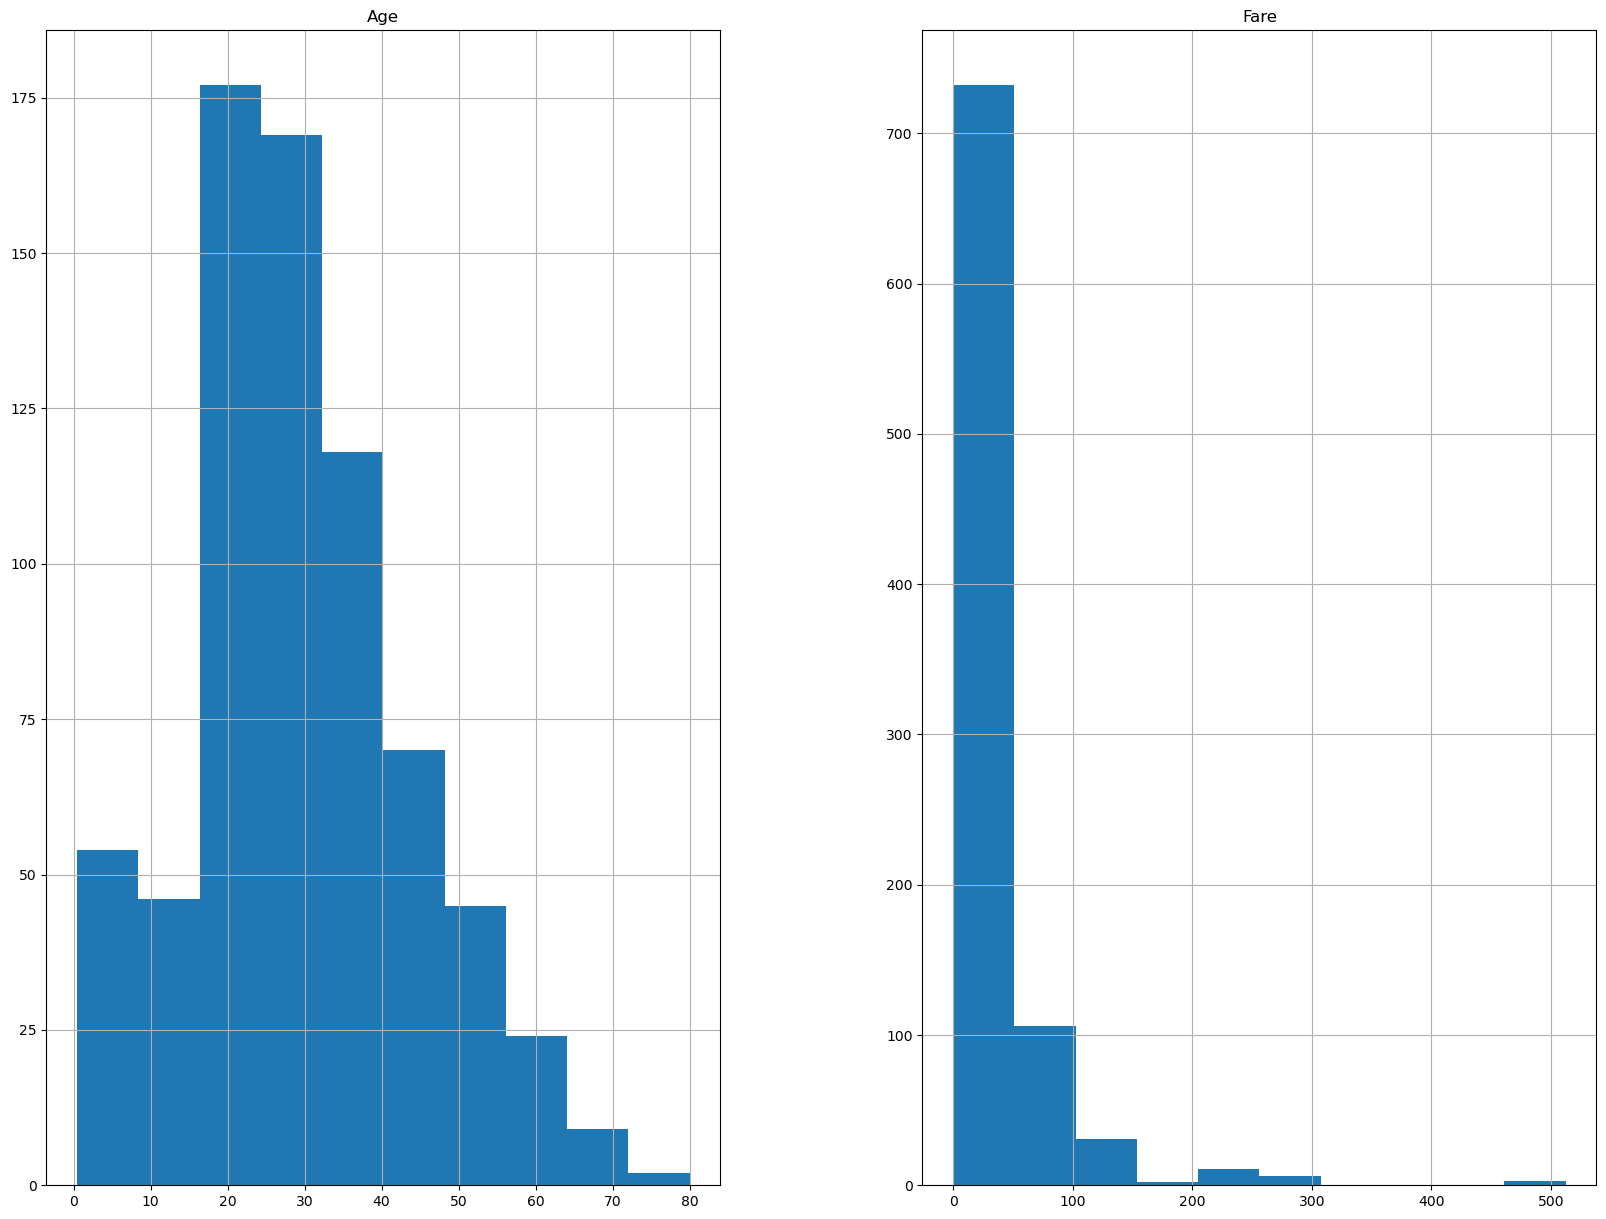

In [49]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [50]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [51]:
df['Age'].isna().sum()

0

In [52]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#fill in mising value column= Cabin,Embarked(objects)

In [53]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [54]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [55]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

## Handling Outliers of Fare

In [58]:
Fq1=np.percentile(df['Fare'],25,interpolation = 'midpoint')
Fq2=np.percentile(df['Fare'],50,interpolation = 'midpoint')
Fq3=np.percentile(df['Fare'],75,interpolation = 'midpoint')

/var/folders/j5/y57l9vp574g0szcfjxf1kxl40000gp/T/ipykernel_57782/1295515627.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Fq1=np.percentile(df['Fare'],25,interpolation = 'midpoint')
/var/folders/j5/y57l9vp574g0szcfjxf1kxl40000gp/T/ipykernel_57782/1295515627.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Fq2=np.percentile(df['Fare'],50,interpolation = 'midpoint')
/var/folders/j5/y57l9vp574g0szcfjxf1kxl40000gp/T/ipykernel_57782/1295515627.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Us

In [59]:
IQR=Fq3-Fq1
print(IQR)

23.0896


In [60]:
Fu_limit=Fq3+1.5*IQR
Fl_limit=Fq1-1.5*IQR
print(Fu_limit)
print(Fl_limit)

65.6344
-26.724


In [62]:
F_outliers = []
for i in df['Fare']:
    if (i>Fu_limit) or (i<Fl_limit):
        F_outliers.append(i)

In [63]:
F_outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [64]:
ind=df['Fare']>Fu_limit
df.loc[ind].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [65]:
df.drop(df.loc[ind].index,inplace=True)

In [66]:
df.shape

(775, 11)

## Handling Outliers of SibSp

In [67]:
Sq1=np.percentile(df['SibSp'],25,interpolation = 'midpoint')
Sq2=np.percentile(df['SibSp'],50,interpolation = 'midpoint')
Sq3=np.percentile(df['SibSp'],75,interpolation = 'midpoint')

/var/folders/j5/y57l9vp574g0szcfjxf1kxl40000gp/T/ipykernel_57782/2588898373.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Sq1=np.percentile(df['SibSp'],25,interpolation = 'midpoint')
/var/folders/j5/y57l9vp574g0szcfjxf1kxl40000gp/T/ipykernel_57782/2588898373.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Sq2=np.percentile(df['SibSp'],50,interpolation = 'midpoint')
/var/folders/j5/y57l9vp574g0szcfjxf1kxl40000gp/T/ipykernel_57782/2588898373.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.


In [68]:
IQR=Sq3-Sq1
print(IQR)

1.0


In [69]:
Su_limit=Sq3+1.5*IQR
Sl_limit=Sq1-1.5*IQR
print(Su_limit)
print(Sl_limit)


2.5
-1.5


In [73]:
S_outliers = []
for i in df['SibSp']:
    if (i>Su_limit) or (i<Sl_limit):
        S_outliers.append(i)

In [74]:
S_outliers

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [75]:
ind=df['SibSp']>Su_limit
df.loc[ind].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [76]:
df.drop(df.loc[ind].index,inplace=True)

In [77]:
df.shape

(739, 11)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [78]:
x=df.drop(['Survived'],axis=1) #Features 
y= df['Survived'] #Target Variable

In [79]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,739.000000,739.000000,739.000000,739.000000,739.000000
mean,2.456022,29.620095,0.274696,0.286874,17.172772
std,0.742917,12.278717,0.506378,0.753657,13.425327
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.891650
50%,3.000000,28.000000,0.000000,0.000000,11.500000
75%,3.000000,34.250000,0.000000,0.000000,25.929200
max,3.000000,80.000000,2.000000,6.000000,65.000000


In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
minmax = MinMaxScaler()

In [ ]:
x=minmax.fit_transform(x)


In [83]:
x.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q


In [84]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,739.000000,739.000000,739.000000,739.000000,739.000000
mean,2.456022,29.620095,0.274696,0.286874,17.172772
std,0.742917,12.278717,0.506378,0.753657,13.425327
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.891650
50%,3.000000,28.000000,0.000000,0.000000,11.500000
75%,3.000000,34.250000,0.000000,0.000000,25.929200
max,3.000000,80.000000,2.000000,6.000000,65.000000
